<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,45.159503,84.041515,28.243779,37.479897,0.299347,205.224041,204.667966,0.556076
1,0.0,1.0,71.746582,23.412244,56.159668,81.021234,1.678050,244.017778,242.896246,1.121532
2,0.0,2.0,72.835067,42.026817,33.351798,74.968003,5.745763,238.927449,234.259822,4.667627
3,0.0,3.0,41.477889,94.558543,24.690261,41.622768,-1.236082,211.113379,212.054426,-0.941047
4,0.0,4.0,25.688058,24.733032,28.293732,35.216784,-2.580999,121.350608,122.971930,-1.621322
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.272661,60.749055,89.787997,74.930861,-1.087972,257.652602,258.860428,-1.207826
19996,999.0,16.0,60.165518,29.912703,48.730358,25.499260,0.459747,174.767586,174.253711,0.513875
19997,999.0,17.0,91.537818,31.480605,72.025308,41.629727,-2.475440,244.198018,246.091190,-1.893172
19998,999.0,18.0,49.543834,31.063851,36.273478,44.814574,-2.001455,169.694282,172.042148,-2.347866


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    45.159503  84.041515  28.243779  37.479897  0.299347  205.224041   
      1.0    71.746582  23.412244  56.159668  81.021234  1.678050  244.017778   
      2.0    72.835067  42.026817  33.351798  74.968003  5.745763  238.927449   
      3.0    41.477889  94.558543  24.690261  41.622768 -1.236082  211.113379   
      4.0    25.688058  24.733032  28.293732  35.216784 -2.580999  121.350608   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   23.272661  60.749055  89.787997  74.930861 -1.087972  257.652602   
      16.0   60.165518  29.912703  48.730358  25.499260  0.459747  174.767586   
      17.0   91.537818  31.480605  72.025308  41.629727 -2.475440  244.198018   
      18.0   49.543834  31.063851  36.273478  44.814574 -2.001455  169.694282   
      19.0   89.242547  67.732547  80.156220  26.759038 -2.142246  271.748107   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    204.667966  0.556076  
      1.0    242.896246  1.121532  
      2.0    234.259822  4.667627  
      3.0    212.054426 -0.941047  
      4.0    122.971930 -1.621322  
...                 ...       ...  
999.0 15.0   258.860428 -1.207826  
      16.0   174.253711  0.513875  
      17.0   246.091190 -1.893172  
      18.0   172.042148 -2.347866  
      19.0   272.096987 -0.348881  

[20000 rows x 8 columns]

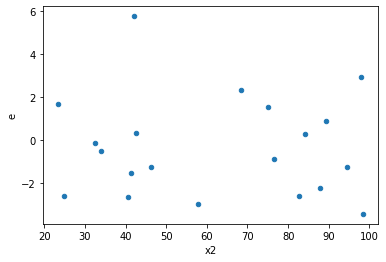

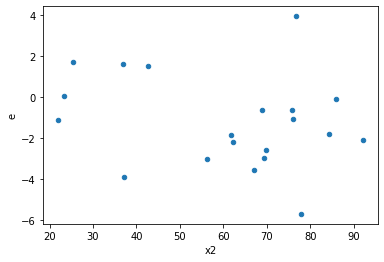

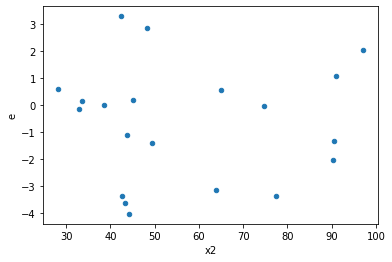

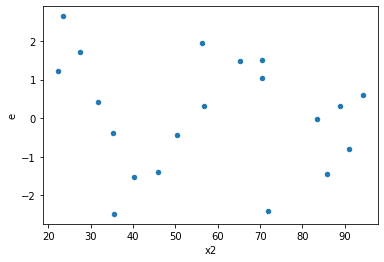

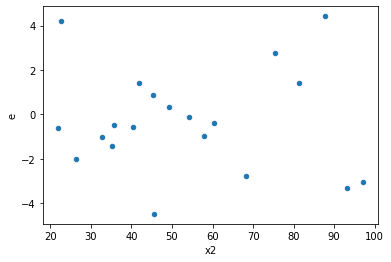

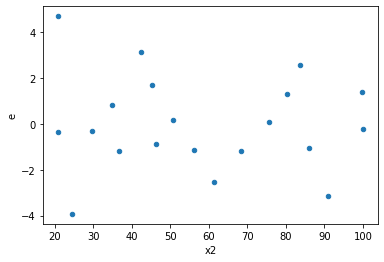

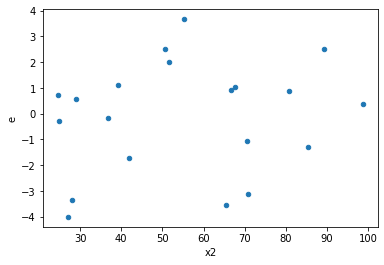

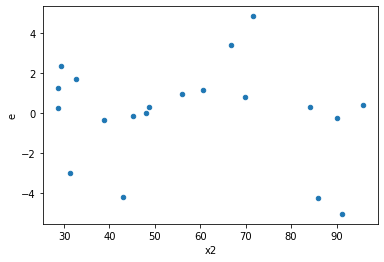

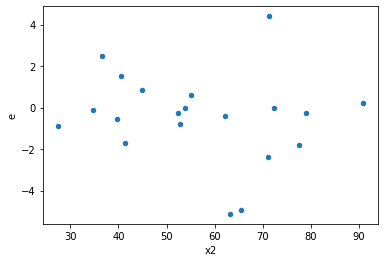

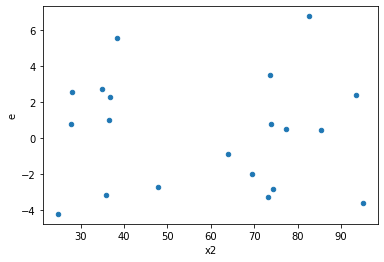

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,2.5145015962906965,29.65760444310399,0.6286253990726741,7.414401110775997,11.794625418752501,0.034742113454144796,0.9826289432729276,0.017371056727072398,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,17.258744764110478,18.272104560199768,4.3146861910276195,4.568026140049942,1.0587157299061847,0.9572307564209379,0.521384621789531,0.47861537821046896,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,2.2789503564948994,8.336078291744366,0.5697375891237249,2.0840195729360915,3.6578586575995136,0.23697086429583303,0.8815145678520835,0.11848543214791651,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,2.090727098319094,15.318012023590438,0.5226817745797735,3.8295030058976094,7.326643460978641,0.07961021511084065,0.9601948924445797,0.03980510755542033,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,17.280838589139197,19.406884662907427,4.320209647284799,4.851721165726857,1.1230291031769966,0.9131726090688113,0.5434136954655944,0.45658630453440563,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,8.824173126724922,17.565601062931517,2.2060432816812305,4.391400265732879,1.990622895841909,0.5213078116159382,0.7393460941920309,0.2606539058079691,Reject001=1 : Homoscedasticity
13.0,4.0,4.0,8.845669734928125,22.389148557116073,2.211417433732031,5.597287139279018,2.531085743424265,0.39035794004897983,0.8048210299755101,0.19517897002448992,Reject001=1 : Homoscedasticity
17.0,4.0,4.0,1.637447486052754,6.364333642396604,0.4093618715131885,1.591083410599151,3.886740610985043,0.21697687474584915,0.8915115626270754,0.10848843737292457,Reject001=1 : Homoscedasticity
20.0,4.0,4.0,6.679158181114915,13.67911794148104,1.6697895452787288,3.41977948537026,2.048030241319672,0.5045673472537144,0.7477163263731428,0.2522836736268572,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,2.5145015962906965,29.65760444310399,0.6286253990726741,7.414401110775997,11.794625418752501,0.034742113454144796,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,27.87124044912948,10.271448825592167,6.96781011228237,2.5678622063980416,0.36853217366982965,0.3569903502799458,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,17.258744764110478,18.272104560199768,4.3146861910276195,4.568026140049942,1.0587157299061847,0.9572307564209379,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,2.2789503564948994,8.336078291744366,0.5697375891237249,2.0840195729360915,3.6578586575995136,0.23697086429583303,Reject001=1 : Homoscedasticity
4.0,4.0,4.0,18.84582732158043,1.5871296076856924,4.711456830395107,0.3967824019214231,0.08421649952550846,0.03432584108306297,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,35.02442137802487,4.006607406102337,8.756105344506217,1.0016518515255843,0.11439467801218767,0.058897681148273644,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,35.42272984817216,1.6701615595595576,8.85568246204304,0.4175403898898894,0.04714943107767679,0.011799148803743822,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,2.090727098319094,15.318012023590438,0.5226817745797735,3.8295030058976094,7.326643460978641,0.07961021511084065,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,17.280838589139197,19.406884662907427,4.320209647284799,4.851721165726857,1.1230291031769966,0.9131726090688113,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      963
Reject001=0 : Heteroscedasticity     37
Name: Result_test, dtype: int64